In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import logging
import datetime
import warnings
import sys
from lmfit.models import PseudoVoigtModel, GaussianModel
#from jupyterthemes import jtplot 
from matplotlib.colors import Normalize

In [5]:
sys.path.append('C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\scripts')

In [6]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *

#jtplot.style('grade3', context='talk', grid=False, ticks=True, fscale=1.5)
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

In [4]:
# atomic sensibility factor : asf -> para normalizar

In [7]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'O1s_sub' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49, 'Ba_3d_5/2' : 7.49, 'Ba_3d_3/2' : 5.20,
            'Br_3p' : 1.054, 'Cu_2p' : 5.321, 'Ba_4d': 2.35, 'Na1s' : 1.685, 'Cl_2s' : 0.37, 'Ru3d' : 4.273,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl2p' : 0.891, 'Cl2p_(2)' : 0.891, 'Cl2p_(3)' : 0.891, 'Si2p': 0.339})

asf2 = {'Ba_3d_5/2' : 25.8, 'Ba_3d_3/2': 17.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.69, }

asf3 = {'Ba_3d_5/2' : 64.3, 'Ba_3d_3/2': 49.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.50}
mfps = {'Cu2p' : 1.86, 'In3d': 3.05, 'Si2p': 3.8}

In [8]:
regss = ['O1s', 'Si2p', 'N1s', 'C1s', 'In3d', 'Ba3d5/2', 'Cl2p', 'Ru3d5/2', 'Si2s']
asfScof = {}
for r in regss:
    asfScof.update(search_asf(r))

# Import data

In [9]:
filehd = 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_14_BOLD131_B1\\20220920_ITO_BOLD_131B1_2gotas_BaCl2_1min.xy'
xpsov = xps_data_import(filehd)

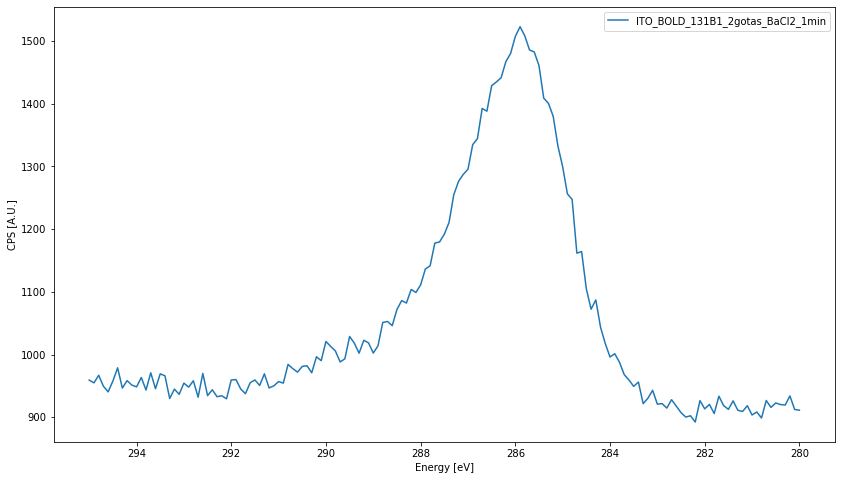

In [10]:
plt.figure(figsize=(14,8))
plot_region(xpsov, 'C1s')


In [11]:
xpsov.dfx #NO hay nada más???

range        Ba3d               C1s              In3d            Sn3d  \
properties energy     counts energy     counts energy   counts energy   
0           789.0  4665.0000  295.0  959.16667  460.0  2565.00  503.0   
1           788.9  4725.9375  294.9  954.79167  459.9  2456.25  502.9   
2           788.8  4697.1875  294.8  966.87500  459.8  2545.00  502.8   
3           788.7  4724.3750  294.7  949.37500  459.7  2512.50  502.7   
4           788.6  4746.5625  294.6  940.41667  459.6  2433.75  502.6   
...           ...        ...    ...        ...    ...      ...    ...   
1200          NaN        NaN    NaN        NaN    NaN      NaN    NaN   
1201          NaN        NaN    NaN        NaN    NaN      NaN    NaN   
1202          NaN        NaN    NaN        NaN    NaN      NaN    NaN   
1203          NaN        NaN    NaN        NaN    NaN      NaN    NaN   
1204          NaN        NaN    NaN        NaN    NaN      NaN    NaN   

range                  O1s             ...    N1s               Si2s           \
properties   counts energy     counts  ... energy      counts energy   counts   
0           3115.00  538.0  3240.3571  ...  409.0   997.89773  157.0  901.750   
1           3172.50  537.9  3222.8571  ...  408.9   996.70455  156.9  913.375   
2           3138.75  537.8  3267.6786  ...  408.8   998.35227  156.8  910.750   
3           3130.00  537.7  3253.3929  ...  408.7  1002.61360  156.7  898.250   
4           3097.50  537.6  3242.1429  ...  408.6   999.43182  156.6  904.625   
...             ...    ...        ...  ...    ...         ...    ...      ...   
1200            NaN    NaN        NaN  ...    NaN         NaN    NaN      NaN   
1201            NaN    NaN        NaN  ...    NaN         NaN    NaN      NaN   
1202            NaN    NaN        NaN  ...    NaN         NaN    NaN      NaN   
1203            NaN    NaN        NaN  ...    NaN         NaN    NaN      NaN   
1204            NaN    NaN        NaN  ...    NaN         NaN    NaN      NaN   

range         Na1s                 overview          Cl2p           
properties  energy     counts        energy counts energy   counts  
0           1085.0  8287.7083  1.200000e+03   8230  207.0  877.625  
1           1084.9  8217.9167  1.199000e+03   8075  206.9  882.250  
2           1084.8  8266.8750  1.198000e+03   8120  206.8  880.750  
3           1084.7  8132.9167  1.197000e+03   8085  206.7  870.500  
4           1084.6  8057.5000  1.196000e+03   7955  206.6  886.875  
...            ...        ...           ...    ...    ...      ...  
1200           NaN        NaN -2.273737e-13    660    NaN      NaN  
1201           NaN        NaN -1.000000e+00    595    NaN      NaN  
1202           NaN        NaN -2.000000e+00    770    NaN      NaN  
1203           NaN        NaN -3.000000e+00    560    NaN      NaN  
1204           NaN        NaN -4.000000e+00    530    NaN      NaN  

[1205 rows x 22 columns]

## Data G2-SL sublimated on ITO ?????

In [12]:
path = 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\'
files = glob.glob(path+'/**/**/*.sxy') #Pablo: xps_spectra/ITO_G2SL/ es lo mismo???
files.sort()
files

['C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_14_BOLD131_B1\\proc\\20220915_ITO_BOLD_131B1_2gota_100grad.sxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_14_BOLD131_B1\\proc\\20220920_ITO_BOLD_131B1_2gotas_BaCl2_1min.sxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_22_BOLD131_C1\\proc\\20220921_ITO_BOLD_131C1_3gota_100grad.sxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_22_BOLD131_C1\\proc\\20220922_ITO_BOLD_131C1_3gota_100grad_air_anneal.sxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_22_BOLD131_C1\\proc\\20220922_ITO_BOLD_131C1_3gota_BaCl2_3min.sxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_26_BOLD132_B1\\proc\\20220926_ITO_BOLD_132B1_90grad.sxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD

In [13]:
g2sl = [read_processed_xp(f) for f in files]
g2sl

[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_14_BOLD131_B1\\proc\\20220915_ITO_BOLD_131B1_2gota_100grad.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_14_BOLD131_B1\\proc\\20220920_ITO_BOLD_131B1_2gotas_BaCl2_1min.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_22_BOLD131_C1\\proc\\20220921_ITO_BOLD_131C1_3gota_100grad.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_22_BOLD131_C1\\proc\\20220922_ITO_BOLD_131C1_3gota_100grad_air_anneal.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spati

[XPS_experiment(path='C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_14_BOLD131_B1\\proc\\20220915_ITO_BOLD_131B1_2gota_100grad.sxy', delimiters="([42, 221, 370, 509, 1742, 2001, 2260, 2399, 2528, 2677, 2778], [151, 121, 111, 1205, 231, 231, 111, 101, 121, 71, 6021], ['C1s', 'Ba3d', 'Cl2p', 'overview', 'In3d', 'Sn3d', 'O1s', 'Si2p', 'N1s', 'Si2s', 'overview_HD'])", name='ITO_BOLD_131B1_2gota_100grad', label='20220915_ITO_BOLD_131B1_2gota_100grad', date='20.22.0915', other_meta='ITO_BOLD_131B1_2gota_100grad', dfx=range        Ba3d            C1s             Cl2p           In3d           \
 properties energy  counts energy    counts energy  counts energy   counts   
 0           789.0   55.75  295.0  11.00000  207.0  16.125  460.0  238.750   
 1           788.9   56.50  294.9   5.68750  206.9  40.000  459.9  210.000   
 2           788.8  115.50  294.8   9.59375  206.8  37.125  459.8  190.625   
 3           788.7   87.25  294.7  18.81250  206.7  1

## Names and colors

In [14]:
names = ['04-ITO clean', '04-ITO plasma', '04-G2-SL 6h',
         '05-ITO clean', '05-G2-SL 2h', '05-BaCl$_2$ 2min/G2-SL 2h', 'BOLD_128_48h', 'BaCl$_2$ 1min BOLD_128_48h']
cols = ['b', 'g', 'r', 'y', 'm', 'c' ,'k', 'green']
for c, n, xp in zip (cols, names, g2sl):
    xp.color = c
    xp.name = n

# Plot regions G2

## Ba/G2/ITO

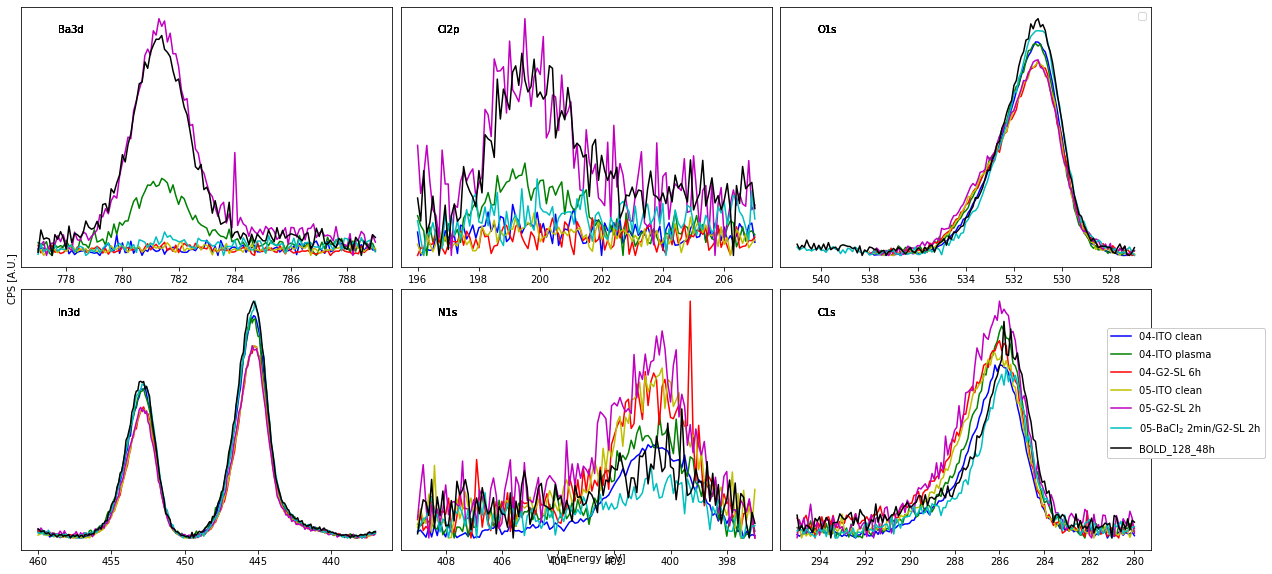

In [16]:
regs = ['Ba3d', 'Cl2p', 'O1s', 'In3d',  'N1s', 'C1s',]
ax = plot_xp_regions(g2sl, regs, ncols=3);
ax[0,0].invert_xaxis()
ax[0,1].invert_xaxis()
# ax[1,0].invert_xaxis()

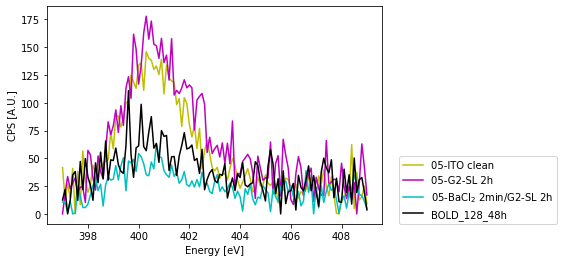

In [17]:
for xp in g2sl[3:]:
    plot_region(xp, 'N1s')
    #plot_region(xp, 'N1s')  #NO encuentra el N1s ni Cl2p ni Ba3d
    plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

    #plt.gca().invert_xaxis()

In [18]:
g2sl[0].dfx.columns.levels

FrozenList([['Ba3d', 'Ba3d_bg', 'C1s', 'C1s_bg', 'Cl2p', 'Cl2p_bg', 'In3d', 'In3d_bg', 'N1s', 'N1s_bg', 'O1s', 'O1s_bg', 'Si2p', 'Si2p_bg', 'Si2s', 'Si2s_bg', 'Sn3d', 'overview', 'overview_HD'], ['counts', 'energy']])

# ???

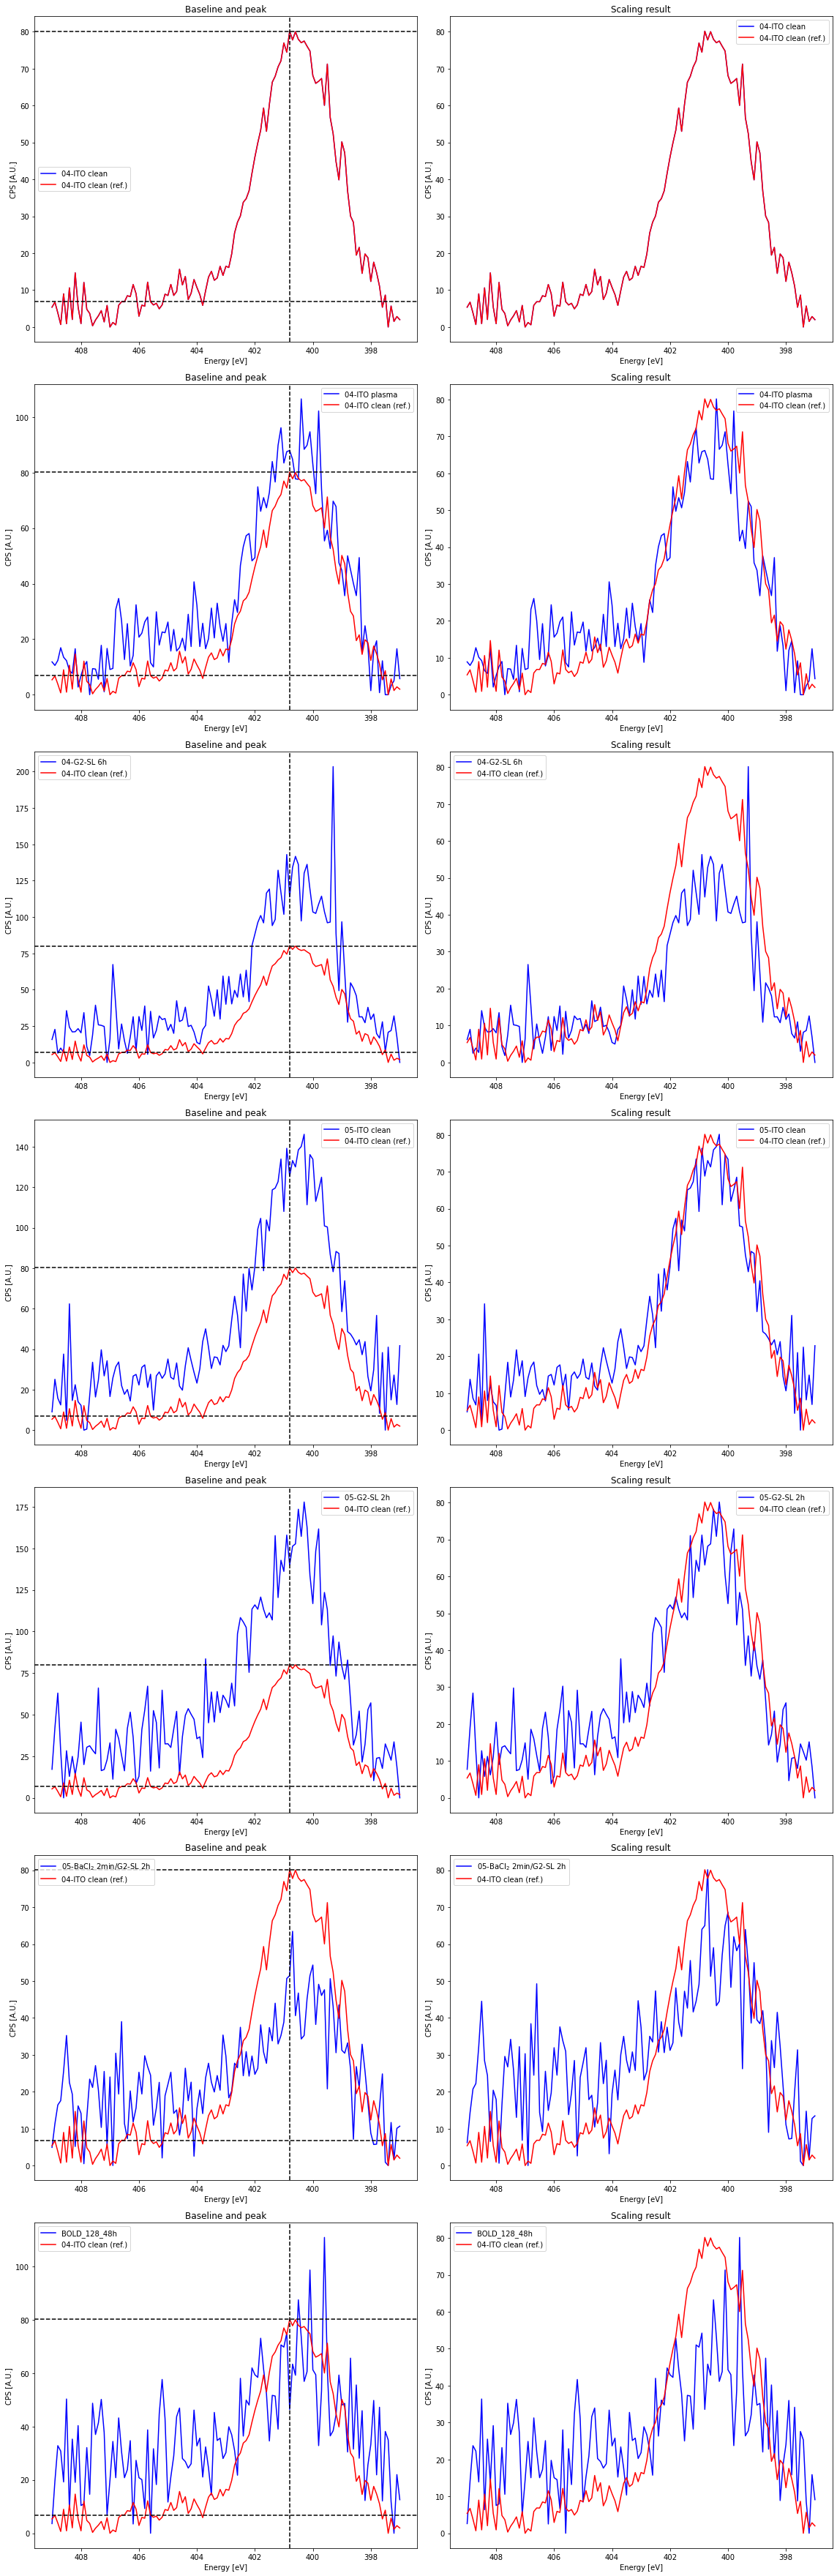

In [19]:
scaled = scale_and_plot_spectra(g2sl, region='N1s')
#salen muchas celdas vacías y da un error: can't multiply sequence by non-int of type 'float'

In [20]:
def drop_region(xp, region):
    xp.dfx.drop(region, level=0, axis=1, inplace=True)
    mi = xp.dfx.columns.remove_unused_levels()    
    xp.dfx.columns = mi

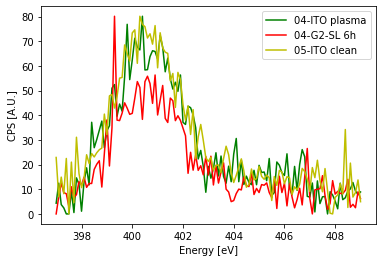

In [21]:
for xp in scaled[1:4]:  # No sale porque corresponde con un vacío????
    plot_region(xp, 'N1s')
plt.gca().invert_xaxis()  

In [22]:
for xp in g2sl:
    drop_region(xp, 'N1s') #NO me deja con 'overview'

In [23]:
g2sl[0].dfx.columns.levels

FrozenList([['Ba3d', 'C1s', 'Cl2p', 'In3d', 'O1s', 'Si2p', 'Si2s', 'Sn3d', 'overview', 'overview_HD', 'C1s_bg', 'N1s_bg', 'O1s_bg', 'Si2p_bg', 'In3d_bg', 'Si2s_bg', 'Ba3d_bg', 'Cl2p_bg'], ['counts', 'energy']])

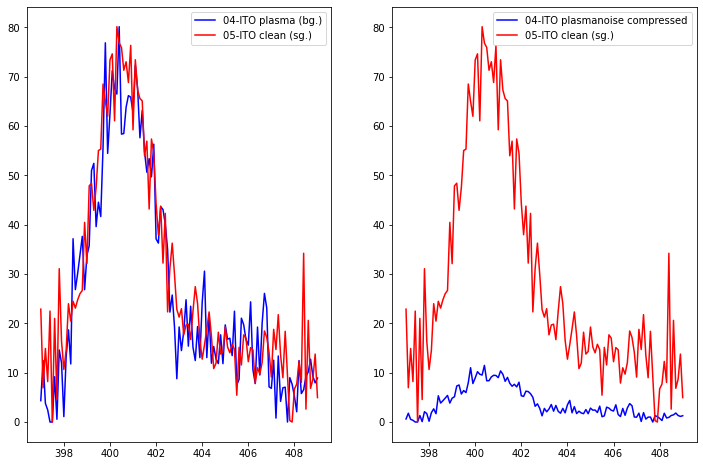

In [24]:
compress_noisy_region(scaled[1], scaled[3], 'N1s', inplace=True);
scaled[1].color = 'b'

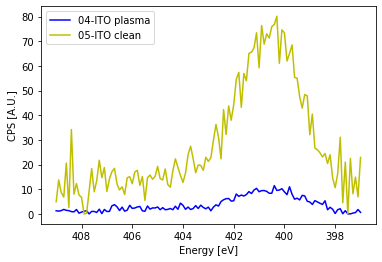

In [25]:
for xp in [scaled[1], scaled[3]]:
    try:
        plot_region(xp, 'N1s')
    except KeyError: pass
plt.gca().invert_xaxis()

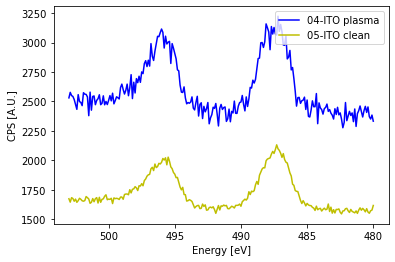

In [26]:
for xp in [scaled[1], scaled[3]]:
    try:
        plot_region(xp, 'Sn3d')
    except KeyError: pass
plt.gca().invert_xaxis()

In [27]:
[xp.name for xp in scaled]

['04-ITO clean',
 '04-ITO plasma',
 '04-G2-SL 6h',
 '05-ITO clean',
 '05-G2-SL 2h',
 '05-BaCl$_2$ 2min/G2-SL 2h',
 'BOLD_128_48h']

In [28]:
for xp in scaled[1:]:
    trim_spectra(xp, scaled[0], region='O1s', inplace=True)

In [29]:
sub=[subtract_ref_region(scaled[2], scaled[1], region='O1s')]
for xp in scaled[0:]:
    subscaled = subtract_ref_region(xp, scaled[3], region='O1s')
    sub.append(subscaled)

for xp in sub:
    crop_spectrum(xp, region='O1s', edw=530.3, inplace=True)

In [30]:
sub[1].color = 'g'
sub[2].color = 'r'

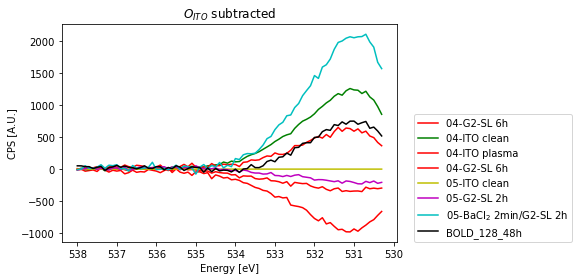

In [31]:
for xp in sub[0:]:
    plot_region(xp, 'O1s')
plt.gca().set(title='$O_{ITO}$ subtracted')
plt.gca().invert_xaxis()
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

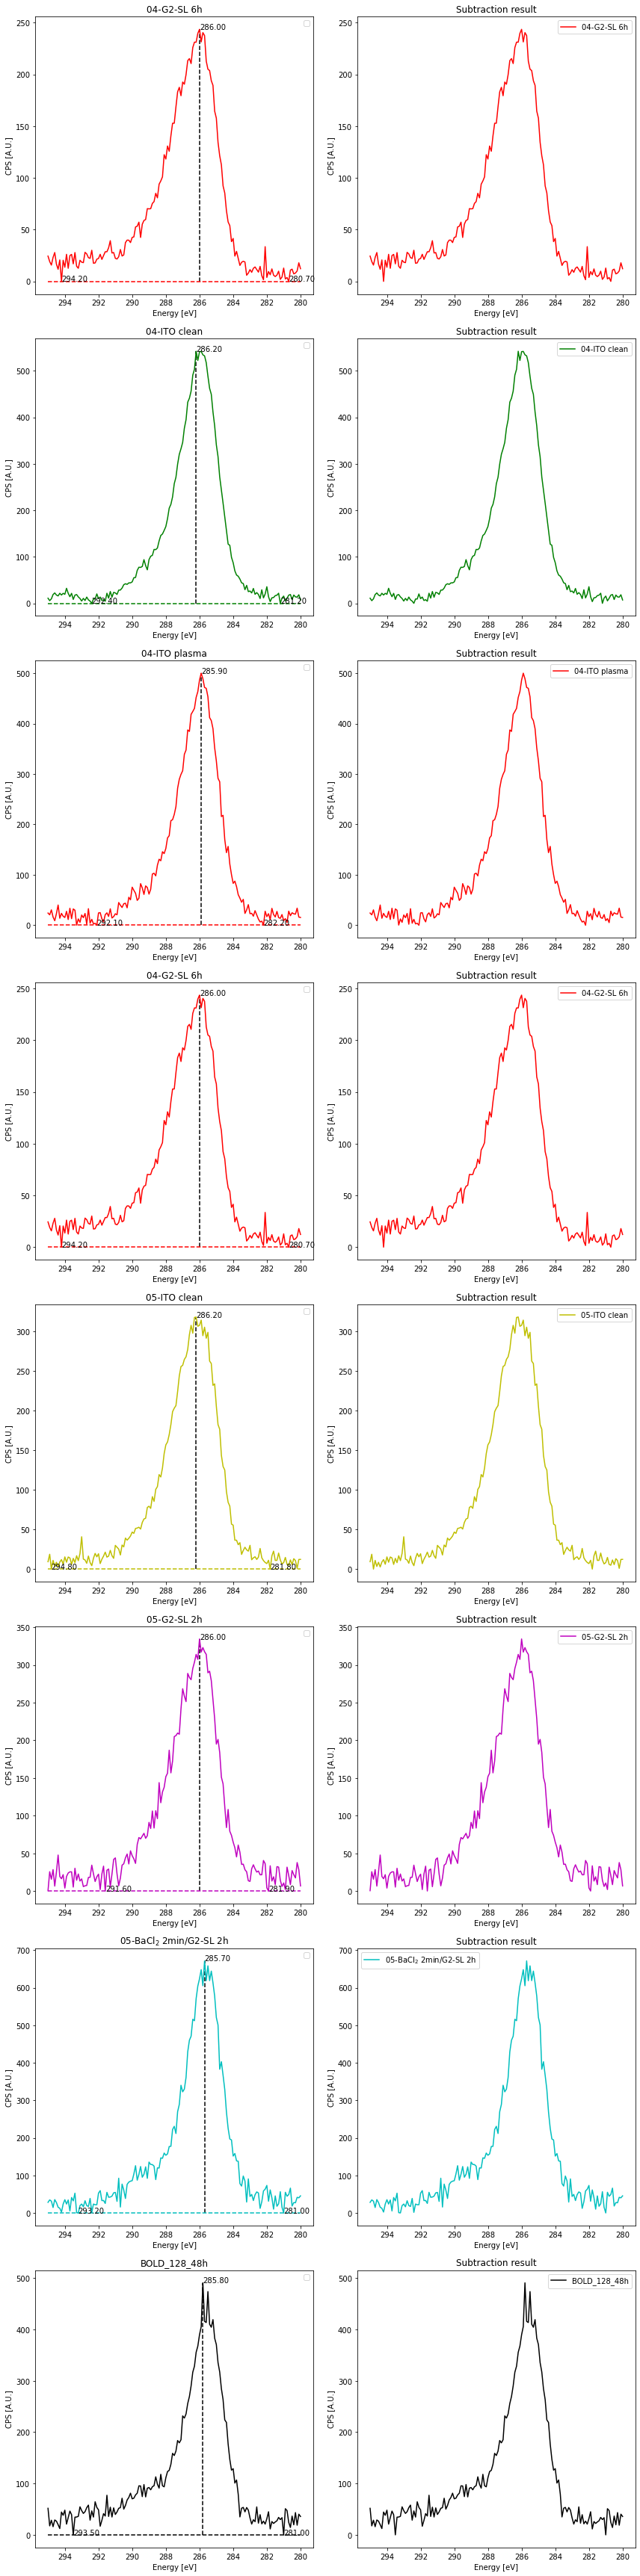

In [38]:
sub = region_bg_subtract(sub, 'C1s') #Sale medio vacío depende del elemento

# Stoichiometry

### Subtract O$_{ITO}$ ??

In [39]:
plot_xp_regions([itoClean, itoClean2] + ruaptes, regs) 

NameError: name 'itoClean' is not defined

### Batch Integration

In [40]:
asfScof['Ba3d'] = 5.8329

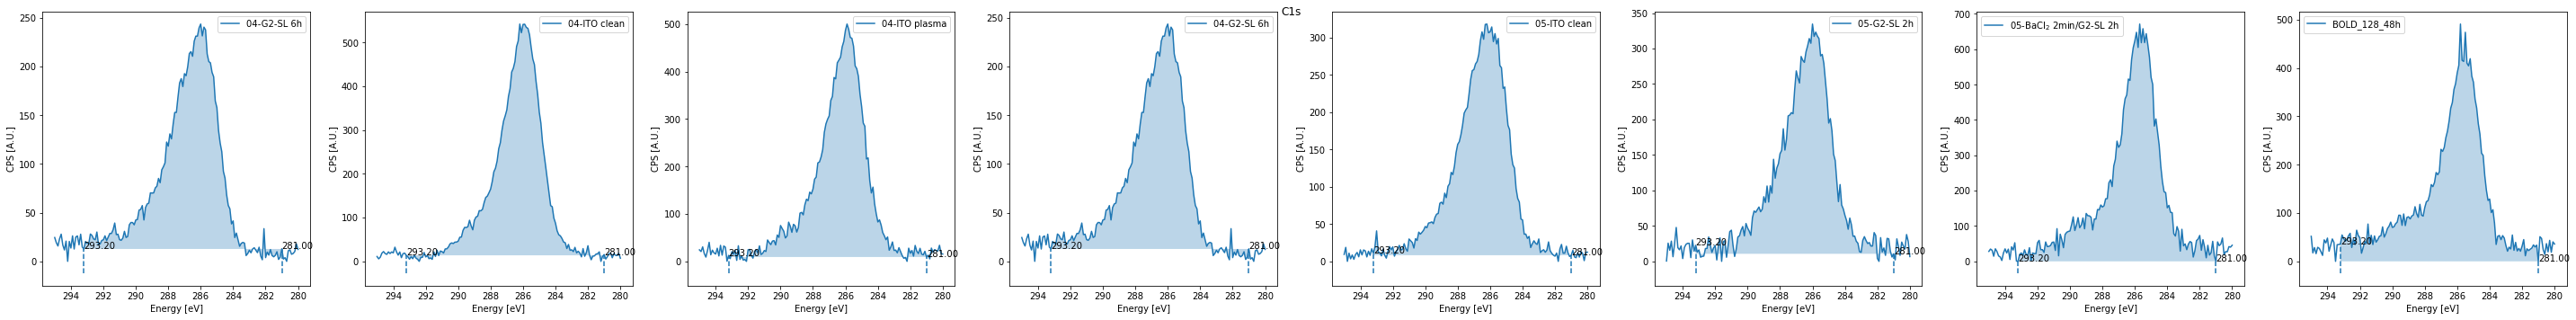

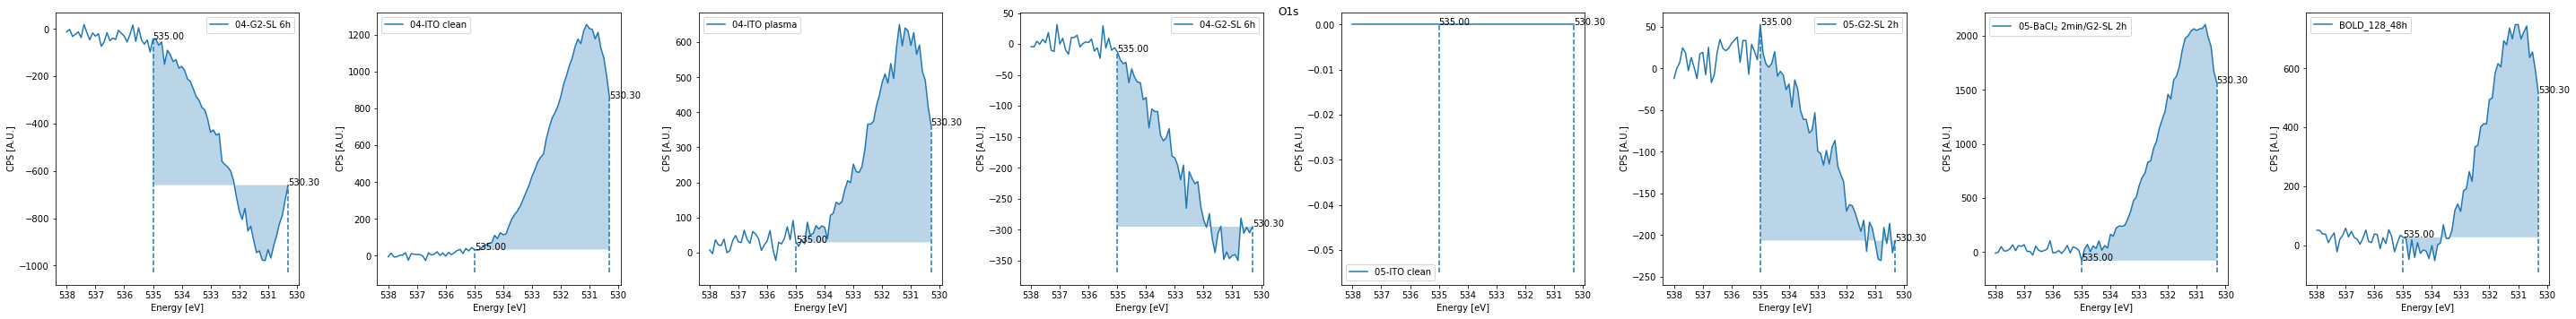

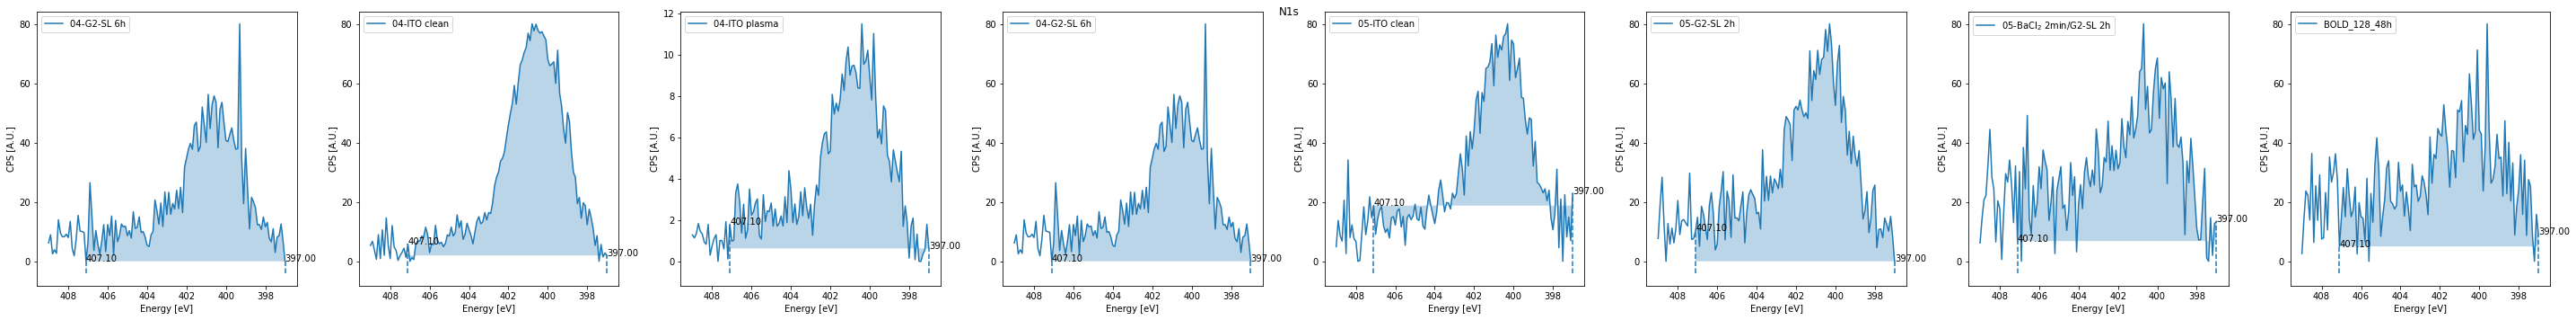

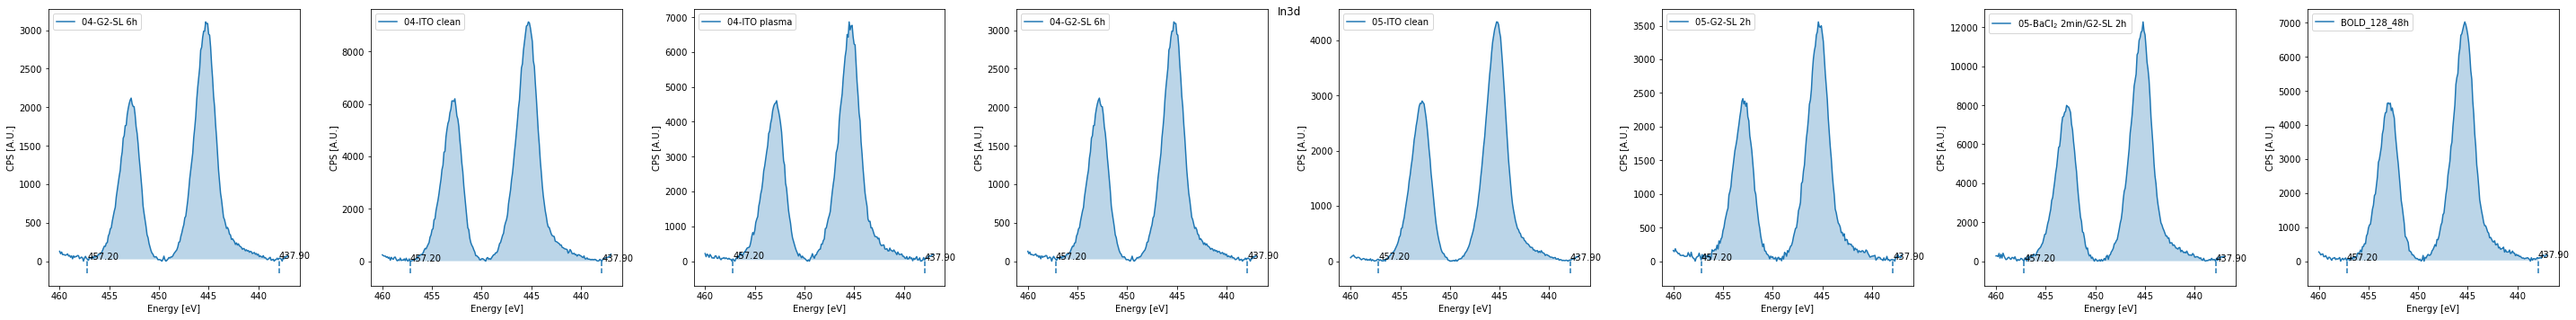

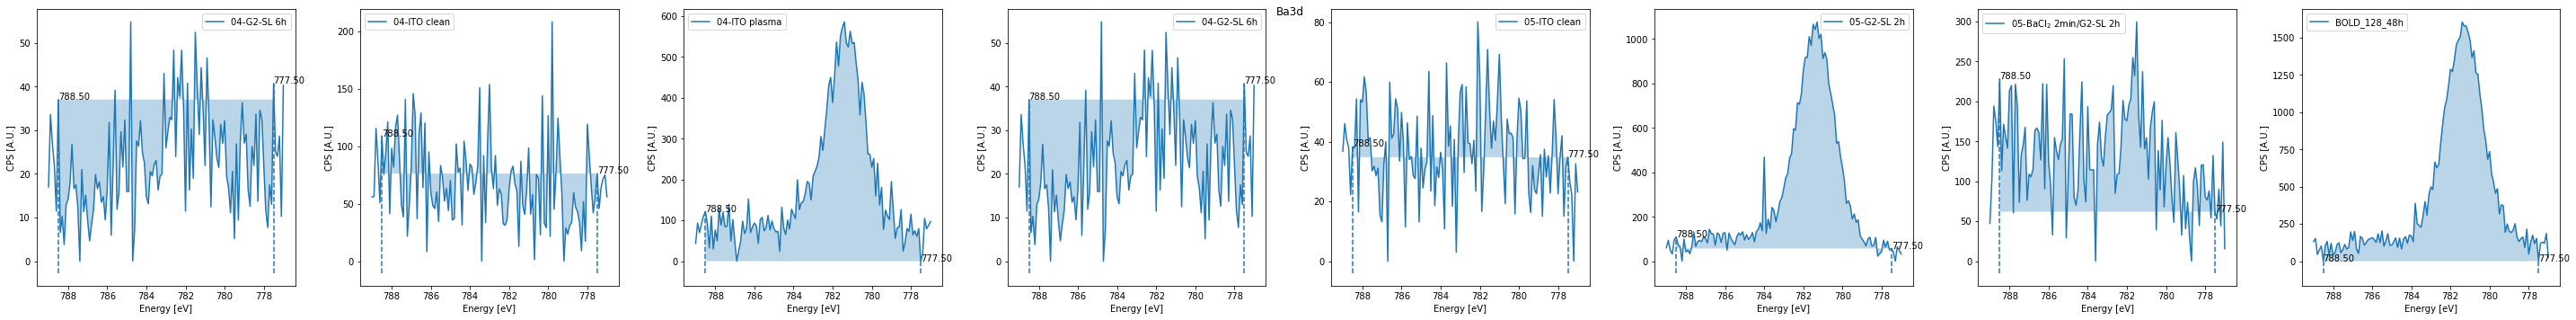

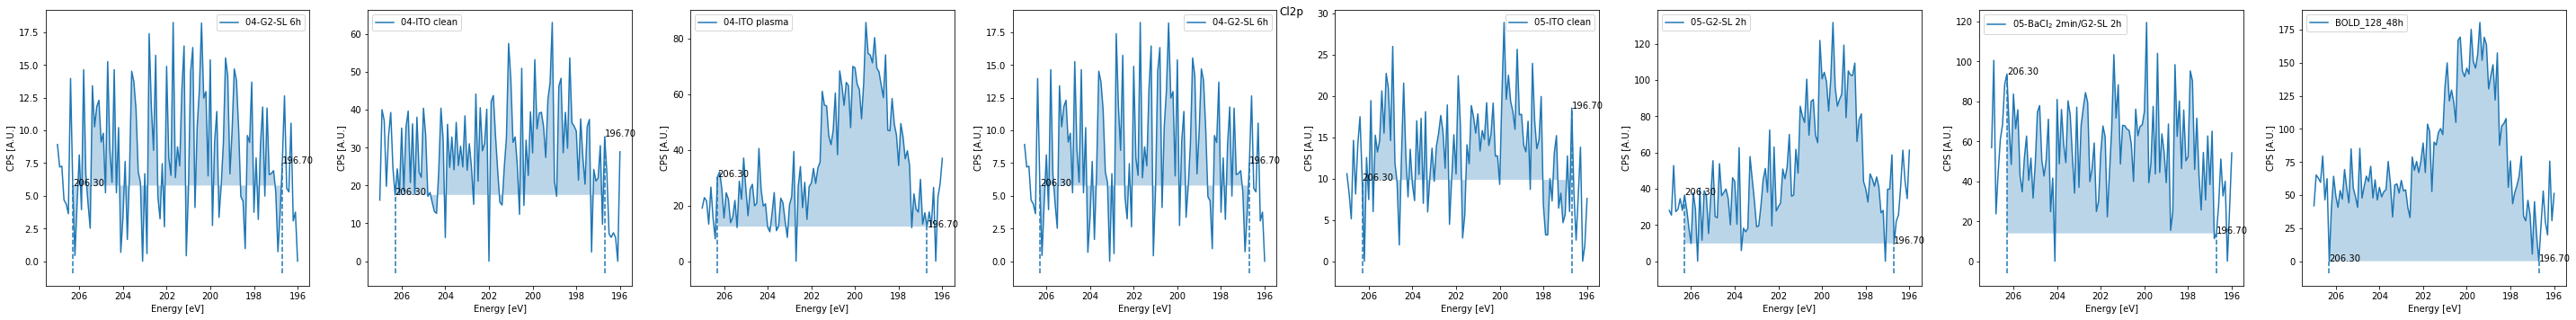

In [41]:
regs = ['C1s', 'O1s', 'N1s', 'In3d', 'Ba3d', 'Cl2p']

for r in regs:
    integrateRegions(sub, r, asfScof)

In [42]:
region = 'Si2p'

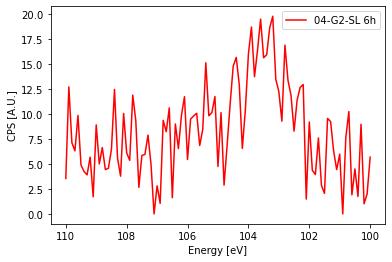

In [43]:
plot_region(sub[3], region)

'Si2p' region does not exist in 05-G2-SL 2h


[12.902927264199787,
 15.791249999999208,
 33.67088710633425,
 12.902927264199787,
 21.155272380052462,
 93.49973316513851,
 16.173293931864155]

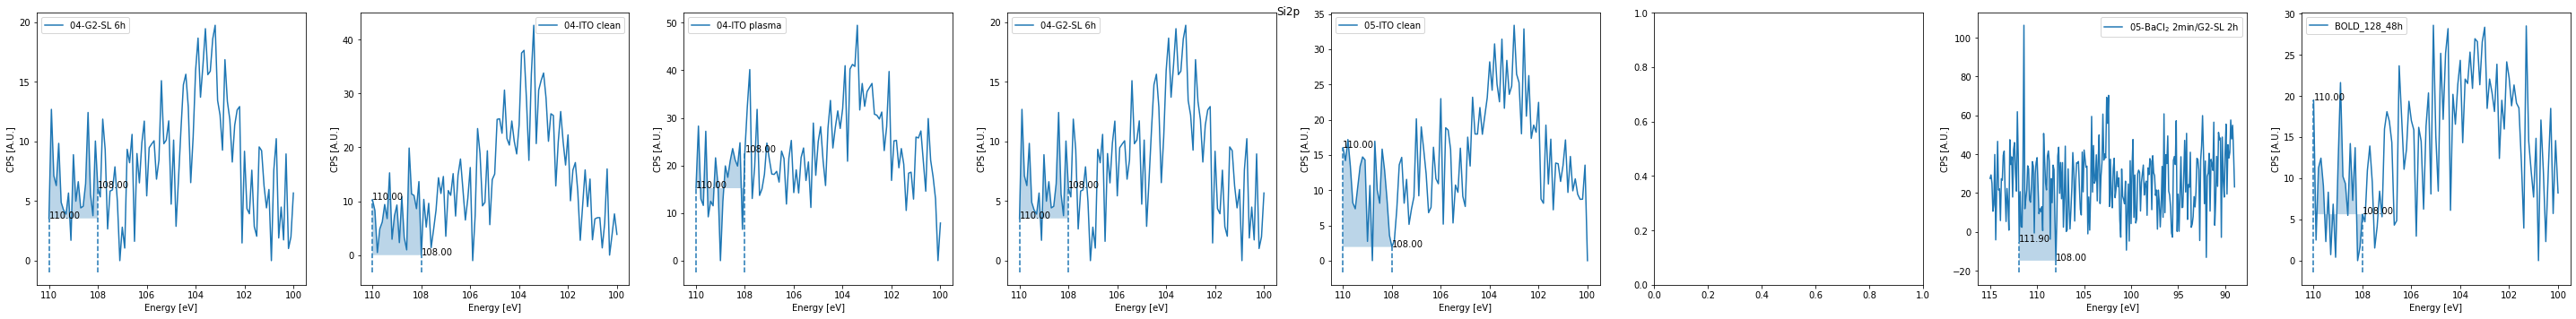

In [44]:
integrateRegions(sub, region, asfScof)

### Results

In [45]:
asfScof['N1s'], asfScof['Si2p']

(0.4063205417607223, 0.18442437923250563)

In [46]:
asf['N1s'] / asf['C1s']

1.6114864864864864

In [47]:
a = {'C1s': 12+6+6+5+2+1+3, 'N1s': 4, 'Si2p': 1, 'O1s': 9, 'Ba3d': 1e-10, 'Cl2p': 1e-10, 'G2': 1, 'Na1s': 1e-10, 'Ru3p': 1e-10}
stog2 = XPS_experiment(name='Sto. G2-SL', area=a)


In [48]:
a['C1s']

35

In [49]:
num = ['C1s', 'O1s', 'C1s']
denom = ['O1s', 'N1s','N1s']
display_stoichiometry(sub+[stog2], num, denom)

In [50]:
num = ['C1s', 'O1s', 'C1s', 'Si2p', 'Si2p'] #No hay Si2p??????
denom = ['O1s', 'N1s','N1s', 'N1s', 'C1s']
display_stoichiometry(sub+[stog2], num, denom)

In [51]:
make_stoichometry_table(sub+[stog2], num, denom)

Experiment\tC1/O1\tO1/N1\tC1/N1\tSi2/N1\tSi2/C1\t
04-G2-SL 6h\t-1.14 \t -6.59 \t 7.49 \t 0.13 \t 0.02 \t 
04-ITO clean\t1.78 \t 5.88 \t 10.49 \t 0.12 \t 0.01 \t 
04-ITO plasma\t3.21 \t 20.77 \t 66.68 \t 1.71 \t 0.03 \t 
04-G2-SL 6h\t-2.89 \t -2.59 \t 7.49 \t 0.13 \t 0.02 \t 
05-ITO clean\tinf \t 0.00 \t 6.60 \t 0.14 \t 0.02 \t 
05-G2-SL 2h\t-7.30 \t -0.95 \t 6.92 \t 0.00 \t 0.00 \t 
05-BaCl$_2$ 2min/G2-SL 2h\t1.43 \t 8.45 \t 12.07 \t 0.63 \t 0.05 \t 
BOLD_128_48h\t3.17 \t 3.06 \t 9.69 \t 0.12 \t 0.01 \t 
Sto. G2-SL\t3.89 \t 2.25 \t 8.75 \t 0.25 \t 0.03 \t 


In [52]:
for xp in sub:
    xp.area['G2'] = xp.area['N1s'] / 4
#     xp.area['G2'] = xp.area['C1s'] / 35  

In [53]:
for xp in sub:
#     xp.area['G2'] = xp.area['N1s'] / 4
    xp.area['G2'] = xp.area['C1s'] / 35  

In [54]:
num = ['Ba3d', 'Cl2p']
denom = ['G2','Ba3d']
display_stoichiometry([sub[2], sub[4]], num, denom)

In [55]:
num = ['Ba3d', 'Cl2p']
denom = ['G2','Ba3d']
display_stoichiometry(sub, num, denom)

In [56]:
num = ['Ba3d']
denom = ['G2']
display_stoichiometry(sub, num, denom)

# Coverage

In [57]:
path = 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\'
files = glob.glob(path+'/**/**/*.uxy')
files.sort()
files

unscaled = [read_processed_xp(f) for f in files]

[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_14_BOLD131_B1\\proc\\20220915_ITO_BOLD_131B1_2gota_100grad.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_14_BOLD131_B1\\proc\\20220920_ITO_BOLD_131B1_2gotas_BaCl2_1min.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_22_BOLD131_C1\\proc\\20220921_ITO_BOLD_131C1_3gota_100grad.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spatial\\2022_09_22_BOLD131_C1\\proc\\20220922_ITO_BOLD_131C1_3gota_100grad_air_anneal.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\BOLD131_C1_spati

In [58]:
file = 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\ITO_G2SL\\2022_09_14_AYN_09\\proc\\20220914_ITO_clean_AYN09.uxy'
clean = read_processed_xp(file)
unscaled.append(clean)

[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\ITO_G2SL\\2022_09_14_AYN_09\\proc\\20220914_ITO_clean_AYN09.uxy.ft', returning empty fit dict


In [59]:
for i, xp in enumerate(unscaled):
    print(i, xp.name)

0 ITO_BOLD_131B1_2gota_100grad
1 ITO_BOLD_131B1_2gotas_BaCl2_1min
2 ITO_BOLD_131C1_3gota_100grad
3 ITO_BOLD_131C1_3gota_100grad_air_anneal
4 ITO_BOLD_131C1_3gota_BaCl2_3min
5 ITO_BOLD_132B1_90grad
6 ITO_BOLD_132B1_90grad_BaCl2_3min
7 ITO_clean_AYN09


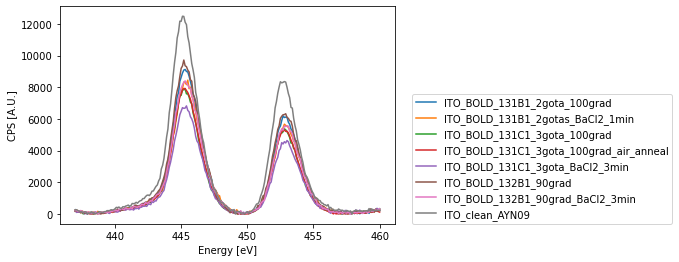

In [60]:
region = 'In3d'
for xp in unscaled:
    plot_region(xp, region)
    plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

In [61]:
inds = [[2, 7],[3,7], [4, 7],[5,7], [6, 7]]
arrange_coverages(unscaled, inds, r_ml=1.1,
                  region='In3d', mfp=3.05, takeoff=10)

matrix([[1.20651666, 0.01855468],
        [1.23641373, 0.01861674],
        [1.56517223, 0.01933108],
        [0.75979669, 0.00489141],
        [1.01374661, 0.0067238 ]])

In [62]:
# xp de referencia incorrecto si sale negativo

<AxesSubplot:xlabel='Layers'>

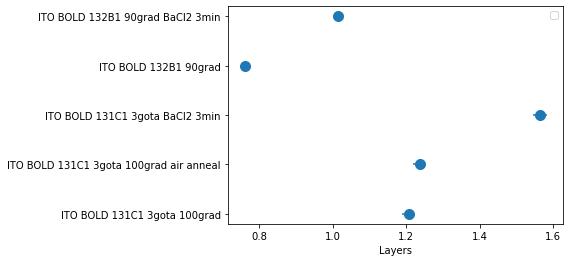

In [63]:
plot_coverages(unscaled) 

# Compare C 1s

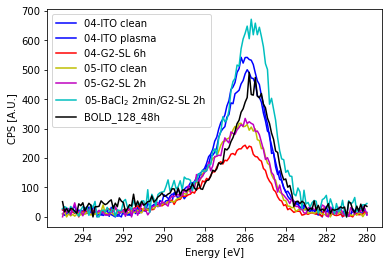

In [64]:
for xp in scaled:
    plot_region(xp, 'C1s') 

In [66]:
norm = [normalise_dfx(xp) for xp in [scaled[2], scaled[3]]]
#norm = [normalise_dfx(xp) for xp in [scaled[2], scaled[4], scaled[7]]] #scaled[4] ya está fuera de rango

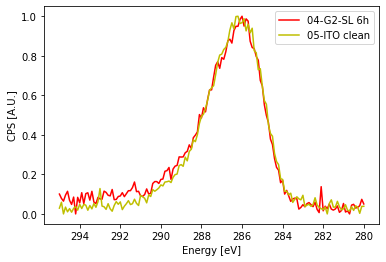

In [67]:
plot_region(norm[0], 'C1s')
plot_region(norm[1], 'C1s')
#plot_region(norm[2], 'C1s')#list index out of range


plt.gca().invert_xaxis()

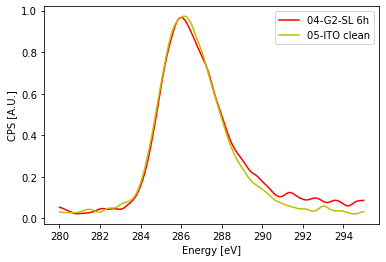

In [68]:
plot_region(gaussian_smooth(norm[0], 'C1s'), 'C1s')
plot_region(gaussian_smooth(norm[1], 'C1s'), 'C1s')
#plot_region(norm[2], 'C1s') #list index out of range

# plt.gca().invert_xaxis()

# Si 2p

In [69]:
crop_spectrum(scaled[7], 'Si2p', edw=100, inplace=True)
crop_spectrum(scaled[6], 'Si2p', edw=100, inplace=True);

IndexError: list index out of range

In [449]:
trim_spectra(scaled[7], scaled[6], 'Si2p', inplace=True);


In [446]:
for xp in scaled[:6]:
    try:
        trim_spectra(xp, scaled[6], 'Si2p', inplace=True)
    except KeyError: pass

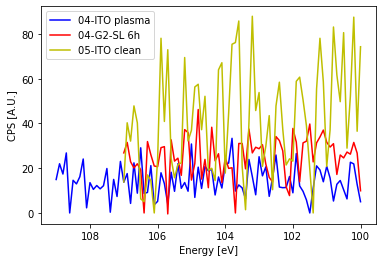

In [83]:
for xp in scaled:
    try:
        plot_region(xp, 'Si2p')
    except KeyError: pass

In [84]:
integrateRegions(sc)

NameError: name 'sc' is not defined